# Exercise 6.5

# Table of Contents

1. Import Libraries and Data
2. Data Prep
3. Data Analysis

# 1. Import Libraries and Data

In [1]:
# Import coding libraries
import pandas as pd
import numpy as np
import os

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab as pl
%matplotlib inline
import seaborn as sns

# Import machine learning libraries
import sklearn
from sklearn.cluster import KMeans

# Confirm execution
print(f'Import libraries completed')

Import libraries completed


In [2]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Define and execute DataFrame verification function.
def verify_df(df):
    '''
    Prints the shape and the first n rows of a DataFrame.
    
    Parameters:
    DF : The DataFrame to display.
    n (int) : The number of rows to display from the top of the DataFrame. Default is 5.
    '''
    print(f'Shape of the DataFrame: {df.shape}')
    print(f'\nDataFrame Preview:\n', df)

In [3]:
# Import PKL as a DataFrame.
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.08.01 University Ranking Analysis/'
file_name = 'Complete_Prepared.pkl'
df_complete = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', file_name))
df_complete

,ranking_institution,year,world_rank,institution,country,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,ARWU,2005,1.0,Harvard University,United States of America,100.0,0,0,1,0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARWU,2005,2.0,University of Cambridge,United Kingdom,73.6,0,0,1,0,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARWU,2005,3.0,Stanford University,United States of America,73.4,0,0,1,0,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARWU,2005,4.0,"University of California, Berkeley",United States of America,72.8,0,0,1,0,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARWU,2005,5.0,Massachusetts Institute of Technology,United States of America,70.1,0,0,1,0,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,Times,2016,NaN,Yeungnam University,South Korea,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
9696,Times,2016,NaN,Yıldız Technical University,Turkey,NaN,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
9697,Times,2016,NaN,Yokohama City University,Japan,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
9698,Times,2016,NaN,Yokohama National University,Japan,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889


# 2. Data Prep

In [4]:
df_complete.dtypes

ranking_institution            object
year                            int64
world_rank                    float64
institution                    object
country                        object
total_score                   float64
Chinese Alignment               int64
Middle Eastern Alignment        int64
Western Alignment               int64
No Alignment                    int64
national_rank                 float64
arwu_alumni_score             float64
arwu_award_score              float64
arwu_hici_score               float64
arwu_ns_score                 float64
arwu_pub_score                float64
arwu_pcp_score                float64
cwur_education_rank           float64
cwur_alumni_rank              float64
cwur_faculty_rank             float64
cwur_publications_rank        float64
cwur_influence_rank           float64
cwur_citations_rank           float64
cwur_impact_rank              float64
cwur_patents_rank             float64
times_teaching_score          float64
times_intern

In [5]:
# Drop variables
df_complete = df_complete.drop(columns=['institution', 'country'])
df_complete

,ranking_institution,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,ARWU,2005,1.0,100.0,0,0,1,0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARWU,2005,2.0,73.6,0,0,1,0,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARWU,2005,3.0,73.4,0,0,1,0,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARWU,2005,4.0,72.8,0,0,1,0,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARWU,2005,5.0,70.1,0,0,1,0,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,Times,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
9696,Times,2016,NaN,NaN,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
9697,Times,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
9698,Times,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889


In [6]:
# Preview dummy variables for 'ranking_institution'
pd.get_dummies(df_complete, columns=['ranking_institution'], drop_first=False)

,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times
0,2005,1.0,100.0,0,0,1,0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
1,2005,2.0,73.6,0,0,1,0,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
2,2005,3.0,73.4,0,0,1,0,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
3,2005,4.0,72.8,0,0,1,0,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
4,2005,5.0,70.1,0,0,1,0,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077,False,False,True
9696,2016,NaN,NaN,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500,False,False,True
9697,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN,False,False,True
9698,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889,False,False,True


In [7]:
# Create dummy variables for 'ranking_institution'
df_complete = pd.get_dummies(df_complete, columns=['ranking_institution'], drop_first=False)
df_complete

In [8]:
# Convert the boolean values to 1s and 0s
df_complete['ranking_institution_ARWU'] = df_complete['ranking_institution_ARWU'].astype(int)
df_complete['ranking_institution_CWUR'] = df_complete['ranking_institution_CWUR'].astype(int)
df_complete['ranking_institution_Times'] = df_complete['ranking_institution_Times'].astype(int)
df_complete

,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times
0,2005,1.0,100.0,0,0,1,0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1,2005,2.0,73.6,0,0,1,0,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
2,2005,3.0,73.4,0,0,1,0,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,2005,4.0,72.8,0,0,1,0,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
4,2005,5.0,70.1,0,0,1,0,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077,0,0,1
9696,2016,NaN,NaN,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500,0,0,1
9697,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN,0,0,1
9698,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889,0,0,1


In [9]:
df_complete.dtypes

year                            int64
world_rank                    float64
total_score                   float64
Chinese Alignment               int64
Middle Eastern Alignment        int64
Western Alignment               int64
No Alignment                    int64
national_rank                 float64
arwu_alumni_score             float64
arwu_award_score              float64
arwu_hici_score               float64
arwu_ns_score                 float64
arwu_pub_score                float64
arwu_pcp_score                float64
cwur_education_rank           float64
cwur_alumni_rank              float64
cwur_faculty_rank             float64
cwur_publications_rank        float64
cwur_influence_rank           float64
cwur_citations_rank           float64
cwur_impact_rank              float64
cwur_patents_rank             float64
times_teaching_score          float64
times_international_score     float64
times_research_score          float64
times_citations_score         float64
times_income

In [10]:
df_cluster = df_complete

In [11]:
df_cluster

,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times
0,2005,1.0,100.0,0,0,1,0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1,2005,2.0,73.6,0,0,1,0,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
2,2005,3.0,73.4,0,0,1,0,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,2005,4.0,72.8,0,0,1,0,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
4,2005,5.0,70.1,0,0,1,0,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077,0,0,1
9696,2016,NaN,NaN,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500,0,0,1
9697,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN,0,0,1
9698,2016,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889,0,0,1


In [14]:
df_cluster.describe()

,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times
count,9700.000000,4414.000000,4502.000000,9700.000000,9700.000000,9700.000000,9700.000000,3828.000000,4896.000000,4895.00000,4895.000000,4875.000000,4895.000000,4895.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2603.000000,2594.000000,2603.000000,2603.000000,2385.000000,2544.000000,2544.000000,2536.000000,2365.000000,9700.000000,9700.000000,9700.000000
mean,2011.900722,266.376756,48.220762,0.150722,0.016392,0.871237,0.036082,28.165099,9.161724,7.69191,16.221491,16.078503,38.254648,21.242329,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,37.801498,52.007440,35.910257,60.921629,48.979874,23873.758648,18.445283,0.154440,1.068446,0.504845,0.226804,0.268351
std,3.344954,290.852820,13.728549,0.357796,0.126983,0.334955,0.186505,42.774497,14.140636,15.49411,14.382710,12.511529,13.050809,9.254351,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,17.604218,22.103825,21.254805,23.073219,21.179938,17675.946877,11.458698,0.105915,0.406535,0.500002,0.418786,0.443124
min,2005.000000,1.000000,23.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,7.300000,8.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.900000,7.100000,2.900000,1.200000,24.200000,462.000000,0.600000,0.000000,0.010101,0.000000,0.000000,0.000000
25%,2009.000000,53.000000,44.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.00000,7.300000,8.000000,28.900000,15.600000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,24.700000,33.425000,19.600000,45.500000,33.000000,12637.750000,11.975000,0.080000,0.851852,0.000000,0.000000,0.000000
50%,2013.000000,118.000000,45.565000,0.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.00000,12.600000,12.800000,36.000000,19.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,33.900000,50.300000,30.500000,62.500000,41.000000,20851.000000,16.100000,0.130000,1.083333,1.000000,0.000000,0.000000
75%,2015.000000,448.750000,52.600000,0.000000,0.000000,1.000000,0.000000,36.000000,15.600000,13.40000,21.700000,19.800000,45.300000,24.500000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,46.400000,69.000000,47.250000,79.050000,59.000000,29991.000000,21.500000,0.210000,1.272727,1.000000,0.000000,1.000000
max,2016.000000,1000.000000,100.000000,1.000000,1.000000,1.000000,1.000000,229.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,99.700000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,0.820000,3.545455,1.000000,1.000000,1.000000


In [15]:
# Compare standar deviation values
std_dev_values = df_cluster.std()
std_dev_values

year                              3.344954
world_rank                      290.852820
total_score                      13.728549
Chinese Alignment                 0.357796
Middle Eastern Alignment          0.126983
Western Alignment                 0.334955
No Alignment                      0.186505
national_rank                    42.774497
arwu_alumni_score                14.140636
arwu_award_score                 15.494110
arwu_hici_score                  14.382710
arwu_ns_score                    12.511529
arwu_pub_score                   13.050809
arwu_pcp_score                    9.254351
cwur_education_rank             121.935100
cwur_alumni_rank                186.779252
cwur_faculty_rank                64.050885
cwur_publications_rank          303.760352
cwur_influence_rank             303.331822
cwur_citations_rank             264.366549
cwur_impact_rank                286.919755
cwur_patents_rank               273.996525
times_teaching_score             17.604218
times_inter

In [18]:
from sklearn.preprocessing import StandardScaler

# Preview scaling
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times
0,-2.063130,-0.912512,3.772066,-0.421272,-0.129093,0.384439,-0.193476,-0.635160,6.424573,5.958233,5.825541,6.708221,4.731635,5.528523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
1,-2.063130,-0.909074,1.848852,-0.421272,-0.129093,0.384439,-0.193476,-0.635160,6.410428,5.532221,2.578255,3.239065,2.501660,4.934148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
2,-2.063130,-0.905635,1.834282,-0.421272,-0.129093,0.384439,-0.193476,-0.611778,2.258847,4.163820,5.025888,4.382128,2.608944,4.728818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
3,-2.063130,-0.902197,1.790573,-0.421272,-0.129093,0.384439,-0.193476,-0.588397,4.430117,4.409099,3.697769,4.621931,2.601281,3.399578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
4,-2.063130,-0.898758,1.593881,-0.421272,-0.129093,0.384439,-0.193476,-0.565016,4.585713,4.706017,3.510025,3.974462,1.995893,3.431998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,1.225574,NaN,NaN,2.373762,-0.129093,0.384439,-0.193476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.090942,-1.253755,-1.176913,-1.492130,-0.641301,-0.108404,-0.274543,-1.175141,-0.357657,-1.009738,-0.541603,1.651202
9696,1.225574,NaN,NaN,-0.421272,7.746373,-2.601195,-0.193476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.323886,-1.679103,-1.332202,-1.804240,-0.235172,0.418404,0.895105,-1.269575,-1.244796,-1.009738,-0.541603,1.651202
9697,1.225574,NaN,NaN,2.373762,-0.129093,0.384439,-0.193476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.784139,-1.624803,-1.209853,-1.062979,-0.523240,-1.117657,-1.287073,-1.175141,NaN,-1.009738,-0.541603,1.651202
9698,1.225574,NaN,NaN,2.373762,-0.129093,0.384439,-0.193476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.005719,-1.299005,-0.936921,-2.055662,-0.405179,-0.778429,-0.553861,-0.702969,-1.671937,-1.009738,-0.541603,1.651202


In [19]:
# Complete scaling
df_cluster = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)
df_cluster

,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times
0,-2.063130,-0.912512,3.772066,-0.421272,-0.129093,0.384439,-0.193476,-0.635160,6.424573,5.958233,5.825541,6.708221,4.731635,5.528523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
1,-2.063130,-0.909074,1.848852,-0.421272,-0.129093,0.384439,-0.193476,-0.635160,6.410428,5.532221,2.578255,3.239065,2.501660,4.934148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
2,-2.063130,-0.905635,1.834282,-0.421272,-0.129093,0.384439,-0.193476,-0.611778,2.258847,4.163820,5.025888,4.382128,2.608944,4.728818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
3,-2.063130,-0.902197,1.790573,-0.421272,-0.129093,0.384439,-0.193476,-0.588397,4.430117,4.409099,3.697769,4.621931,2.601281,3.399578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
4,-2.063130,-0.898758,1.593881,-0.421272,-0.129093,0.384439,-0.193476,-0.565016,4.585713,4.706017,3.510025,3.974462,1.995893,3.431998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990356,-0.541603,-0.605619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,1.225574,NaN,NaN,2.373762,-0.129093,0.384439,-0.193476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.090942,-1.253755,-1.176913,-1.492130,-0.641301,-0.108404,-0.274543,-1.175141,-0.357657,-1.009738,-0.541603,1.651202
9696,1.225574,NaN,NaN,-0.421272,7.746373,-2.601195,-0.193476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.323886,-1.679103,-1.332202,-1.804240,-0.235172,0.418404,0.895105,-1.269575,-1.244796,-1.009738,-0.541603,1.651202
9697,1.225574,NaN,NaN,2.373762,-0.129093,0.384439,-0.193476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.784139,-1.624803,-1.209853,-1.062979,-0.523240,-1.117657,-1.287073,-1.175141,NaN,-1.009738,-0.541603,1.651202
9698,1.225574,NaN,NaN,2.373762,-0.129093,0.384439,-0.193476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.005719,-1.299005,-0.936921,-2.055662,-0.405179,-0.778429,-0.553861,-0.702969,-1.671937,-1.009738,-0.541603,1.651202


In [23]:
# Preview imputed mean values for null observations
df_cluster.fillna(df_cluster.mean())

,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times
0,-2.063130,-9.125125e-01,3.772066e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.351600e-01,6.424573e+00,5.958233e+00,5.825541e+00,6.708221e+00,4.731635e+00,5.528523e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619
1,-2.063130,-9.090739e-01,1.848852e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.351600e-01,6.410428e+00,5.532221e+00,2.578255e+00,3.239065e+00,2.501660e+00,4.934148e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619
2,-2.063130,-9.056353e-01,1.834282e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.117785e-01,2.258847e+00,4.163820e+00,5.025888e+00,4.382128e+00,2.608944e+00,4.728818e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619
3,-2.063130,-9.021968e-01,1.790573e+00,-0.421272,-0.129093,0.384439,-0.193476,-5.883970e-01,4.430117e+00,4.409099e+00,3.697769e+00,4.621931e+00,2.601281e+00,3.399578e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619
4,-2.063130,-8.987582e-01,1.593881e+00,-0.421272,-0.129093,0.384439,-0.193476,-5.650156e-01,4.585713e+00,4.706017e+00,3.510025e+00,3.974462e+00,1.995893e+00,3.431998e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,1.225574,-7.082891e-17,-1.641414e-16,2.373762,-0.129093,0.384439,-0.193476,2.969876e-17,5.805088e-17,-3.483764e-17,8.128783e-17,1.749028e-17,-1.916070e-16,-6.386901e-17,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,-1.090942e+00,-1.253755e+00,-1.176913e+00,-1.492130e+00,-6.413013e-01,-1.084035e-01,-2.745426e-01,-1.175141e+00,-3.576571e-01,-1.009738,-0.541603,1.651202
9696,1.225574,-7.082891e-17,-1.641414e-16,-0.421272,7.746373,-2.601195,-0.193476,2.969876e-17,5.805088e-17,-3.483764e-17,8.128783e-17,1.749028e-17,-1.916070e-16,-6.386901e-17,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,-1.323886e+00,-1.679103e+00,-1.332202e+00,-1.804240e+00,-2.351715e-01,4.184045e-01,8.951045e-01,-1.269575e+00,-1.244796e+00,-1.009738,-0.541603,1.651202
9697,1.225574,-7.082891e-17,-1.641414e-16,2.373762,-0.129093,0.384439,-0.193476,2.969876e-17,5.805088e-17,-3.483764e-17,8.128783e-17,1.749028e-17,-1.916070e-16,-6.386901e-17,-1.808654e-16,-2.583792e-

In [24]:
# Impute mean values for null observations
df_cluster = df_cluster.fillna(df_cluster.mean())
df_cluster

# 3. Data Analysis

In [25]:
# Set cluster parameters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))]
score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-159872.0,
 -138233.5642745273,
 -123629.14597499366,
 -109391.90612857167,
 -98194.13816140118,
 -87699.69592201643,
 -79239.35006910929,
 -71097.76768087136,
 -66038.19277558557]

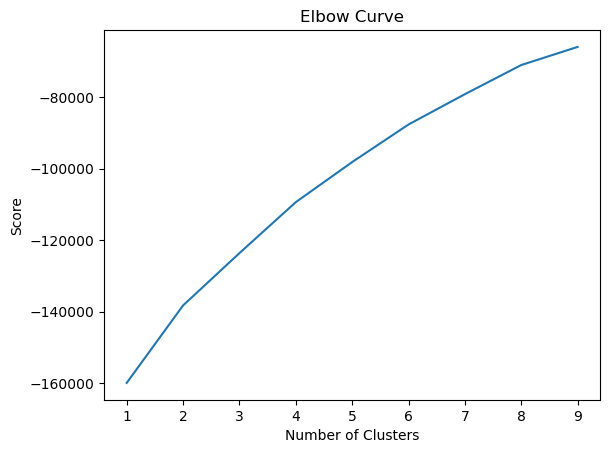

In [26]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette score is 0.1894


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette score is 0.2312


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette score is 0.2349


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette score is 0.2722


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette score is 0.2781


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette score is 0.3084


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette score is 0.3061


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette score is 0.3234


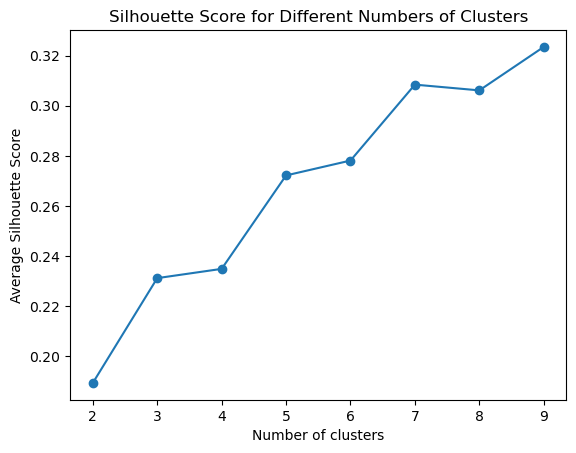

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Range of cluster numbers to try
num_clusters = range(2, 10)

# List to store the average silhouette scores
silhouette_scores = []

for n_clusters in num_clusters:
    # Initialize k-means with the given number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df_cluster)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df_cluster, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.4f}")

# Plot the silhouette scores
import matplotlib.pyplot as plt

plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

Because the elbow technique provided a smooth arc, I tried the Silhouette Coefficient technique. The low scores indicate poor clustering, but for the sake of this assignment, I'm going to use the cluster count with the highest score, 9 clusters.

In [28]:
# k-means algorithm
kmeans = KMeans(n_clusters = 9) 
kmeans.fit(df_cluster)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [29]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)
df_cluster

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times,clusters
0,-2.063130,-9.125125e-01,3.772066e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.351600e-01,6.424573e+00,5.958233e+00,5.825541e+00,6.708221e+00,4.731635e+00,5.528523e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8
1,-2.063130,-9.090739e-01,1.848852e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.351600e-01,6.410428e+00,5.532221e+00,2.578255e+00,3.239065e+00,2.501660e+00,4.934148e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8
2,-2.063130,-9.056353e-01,1.834282e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.117785e-01,2.258847e+00,4.163820e+00,5.025888e+00,4.382128e+00,2.608944e+00,4.728818e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8
3,-2.063130,-9.021968e-01,1.790573e+00,-0.421272,-0.129093,0.384439,-0.193476,-5.883970e-01,4.430117e+00,4.409099e+00,3.697769e+00,4.621931e+00,2.601281e+00,3.399578e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8
4,-2.063130,-8.987582e-01,1.593881e+00,-0.421272,-0.129093,0.384439,-0.193476,-5.650156e-01,4.585713e+00,4.706017e+00,3.510025e+00,3.974462e+00,1.995893e+00,3.431998e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,1.225574,-7.082891e-17,-1.641414e-16,2.373762,-0.129093,0.384439,-0.193476,2.969876e-17,5.805088e-17,-3.483764e-17,8.128783e-17,1.749028e-17,-1.916070e-16,-6.386901e-17,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,-1.090942e+00,-1.253755e+00,-1.176913e+00,-1.492130e+00,-6.413013e-01,-1.084035e-01,-2.745426e-01,-1.175141e+00,-3.576571e-01,-1.009738,-0.541603,1.651202,4
9696,1.225574,-7.082891e-17,-1.641414e-16,-0.421272,7.746373,-2.601195,-0.193476,2.969876e-17,5.805088e-17,-3.483764e-17,8.128783e-17,1.749028e-17,-1.916070e-16,-6.386901e-17,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,-1.323886e+00,-1.679103e+00,-1.332202e+00,-1.804240e+00,-2.351715e-01,4.184045e-01,8.951045e-01,-1.269575e+00,-1.244796e+00,-1.009738,-0.541603,1.651202,7
9697,1.225574,-7.082891e-17,-1.641414e-16,2.373762,-0.129093,0.384439,-0.193476,2.969876e-17,5.805088e-17,-3.483764e-17,8.128783e-17,1.749028e-17,-1.916070e-16,-6.386901e-1

In [30]:
df_cluster['clusters'].value_counts()

clusters
2    3296
4    2236
6    1061
0     977
3     753
1     737
5     350
7     159
8     131
Name: count, dtype: int64

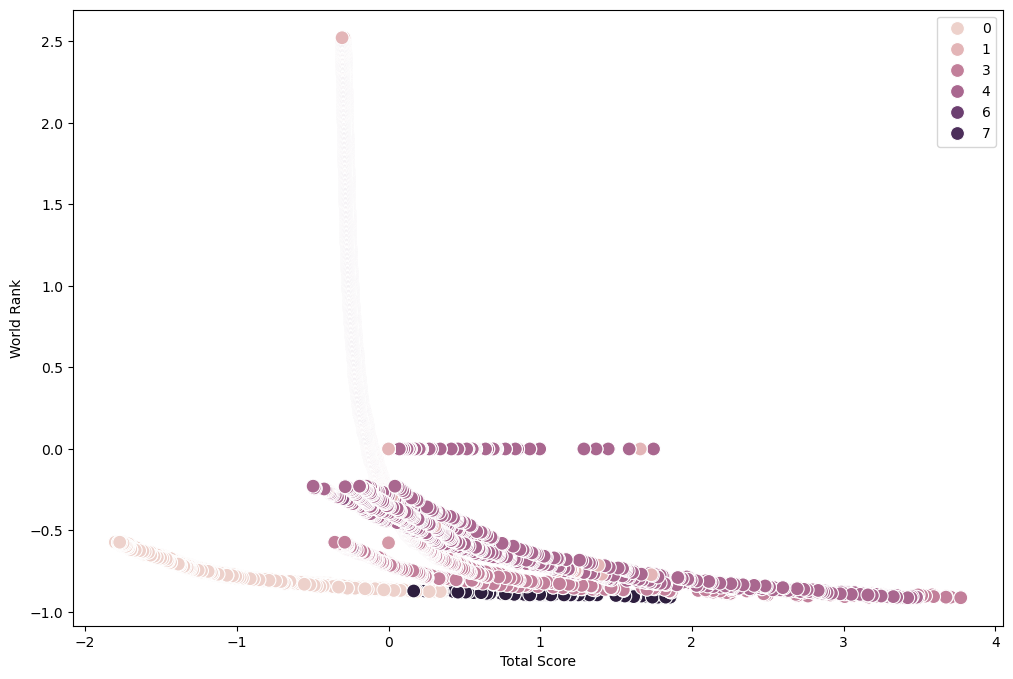

In [32]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['total_score'], y=df_cluster['world_rank'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Total Score')
plt.ylabel('World Rank')
plt.show()

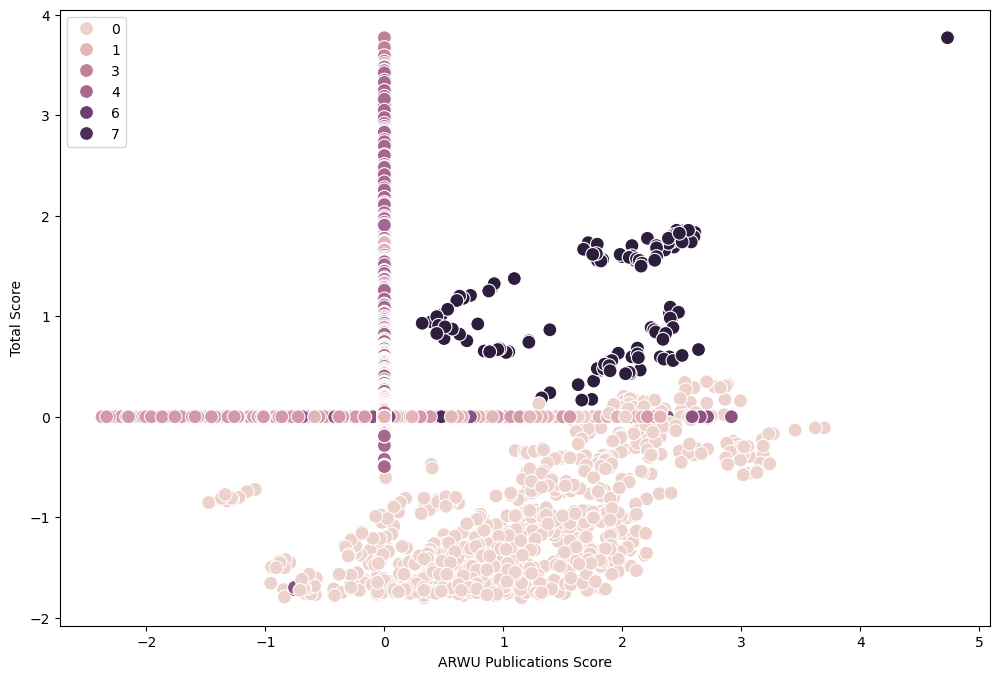

In [37]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['arwu_pub_score'], y=df_cluster['total_score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('ARWU Publications Score')
plt.ylabel('Total Score')
plt.show()

With the two visualizations above, several clusters make sense based on their groupings or linear nature, but these are the only two visualizations that I found that have variety in their distribution. I think because of the binary nature of many of my variables and the fact that the full data table is basically three separate datasets stacked on top of each other, this dataset doesn't work well with clustering.

In [38]:
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'Cluster 1'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'Cluster 2'
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'Cluster 3'
df_cluster.loc[df_cluster['clusters'] == 3, 'cluster'] = 'Cluster 4'
df_cluster.loc[df_cluster['clusters'] == 4, 'cluster'] = 'Cluster 5'
df_cluster.loc[df_cluster['clusters'] == 5, 'cluster'] = 'Cluster 6'
df_cluster.loc[df_cluster['clusters'] == 6, 'cluster'] = 'Cluster 7'
df_cluster.loc[df_cluster['clusters'] == 7, 'cluster'] = 'Cluster 8'
df_cluster.loc[df_cluster['clusters'] == 8, 'cluster'] = 'Cluster 9'
df_cluster

,year,world_rank,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,ranking_institution_ARWU,ranking_institution_CWUR,ranking_institution_Times,clusters,cluster
0,-2.063130,-9.125125e-01,3.772066e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.351600e-01,6.424573e+00,5.958233e+00,5.825541e+00,6.708221e+00,4.731635e+00,5.528523e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8,Cluster 9
1,-2.063130,-9.090739e-01,1.848852e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.351600e-01,6.410428e+00,5.532221e+00,2.578255e+00,3.239065e+00,2.501660e+00,4.934148e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8,Cluster 9
2,-2.063130,-9.056353e-01,1.834282e+00,-0.421272,-0.129093,0.384439,-0.193476,-6.117785e-01,2.258847e+00,4.163820e+00,5.025888e+00,4.382128e+00,2.608944e+00,4.728818e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8,Cluster 9
3,-2.063130,-9.021968e-01,1.790573e+00,-0.421272,-0.129093,0.384439,-0.193476,-5.883970e-01,4.430117e+00,4.409099e+00,3.697769e+00,4.621931e+00,2.601281e+00,3.399578e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8,Cluster 9
4,-2.063130,-8.987582e-01,1.593881e+00,-0.421272,-0.129093,0.384439,-0.193476,-5.650156e-01,4.585713e+00,4.706017e+00,3.510025e+00,3.974462e+00,1.995893e+00,3.431998e+00,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,2.402142e-16,3.834849e-17,2.402142e-16,-9.826945e-17,1.638568e-16,-8.728168e-18,2.010970e-16,-1.793168e-16,-2.824144e-16,0.990356,-0.541603,-0.605619,8,Cluster 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,1.225574,-7.082891e-17,-1.641414e-16,2.373762,-0.129093,0.384439,-0.193476,2.969876e-17,5.805088e-17,-3.483764e-17,8.128783e-17,1.749028e-17,-1.916070e-16,-6.386901e-17,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,-1.090942e+00,-1.253755e+00,-1.176913e+00,-1.492130e+00,-6.413013e-01,-1.084035e-01,-2.745426e-01,-1.175141e+00,-3.576571e-01,-1.009738,-0.541603,1.651202,4,Cluster 5
9696,1.225574,-7.082891e-17,-1.641414e-16,-0.421272,7.746373,-2.601195,-0.193476,2.969876e-17,5.805088e-17,-3.483764e-17,8.128783e-17,1.749028e-17,-1.916070e-16,-6.386901e-17,-1.808654e-16,-2.583792e-17,1.550275e-16,-7.751375e-17,-3.875688e-17,-7.751375e-17,1.421085e-17,-2.583792e-17,-1.323886e+00,-1.679103e+00,-1.332202e+00,-1.804240e+00,-2.351715e-01,4.184045e-01,8.951045e-01,-1.269575e+00,-1.244796e+00,-1.009738,-0.541603,1.651202,7,Cluster 8
9697,1.225574,-7.082891e-17,-1.641414e-16,2.373762,-0.129093,0.384439,-0.193476,2.969876e-

In [40]:
df_cluster.groupby('cluster').agg({'world_rank':['mean', 'median'], 
                         'total_score':['mean', 'median'], 
                         'national_rank':['mean', 'median']})

world_rank                 total_score               national_rank  \
                mean        median          mean        median          mean   
cluster                                                                        
Cluster 1  -0.716211 -7.199534e-01 -1.144221e+00 -1.305510e+00 -2.562024e-01   
Cluster 2   0.412986 -7.082891e-17 -2.263134e-02 -1.641414e-16 -2.453150e-04   
Cluster 3  -0.000175 -7.082891e-17 -1.641414e-16 -1.641414e-16 -6.363869e-02   
Cluster 4  -0.490424 -5.824112e-01  3.788541e-01  7.789293e-02 -8.496571e-02   
Cluster 5  -0.273039 -7.082891e-17  4.361412e-01 -1.641414e-16  2.969876e-17   
Cluster 6   0.327918 -7.082891e-17 -6.219447e-02 -1.641414e-16 -2.799355e-01   
Cluster 7   1.201528  1.202199e+00 -2.465103e-01 -2.593979e-01  6.984433e-01   
Cluster 8   0.649236 -7.082891e-17 -9.108817e-02 -1.641414e-16 -2.976907e-01   
Cluster 9  -0.893692 -8.953197e-01  1.312161e+00  1.040228e+00 -5.459177e-01   

                         
                 median  
cluster                  
Cluster 1 -4.247267e-01  
Cluster 2  2.969876e-17  
Cluster 3  2.969876e-17  
Cluster 4 -4.013453e-01  
Cluster 5  2.969876e-17  
Cluster 6 -2.610564e-01  
Cluster 7  8.966562e-02  
Cluster 8 -4.247267e-01  
Cluster 9 -5.650156e-01

These specific results don't appear to be directly useful. However, they do tell me that I should consider analyzing the three separate datasets for their own clusters. That being said, I feel like I've learned a lot here that I'll be able to use on other datasets!